<a href="https://colab.research.google.com/github/kohyunsil/Algo_camping/blob/feature%2Fmodeling/camping_modeling/congestion/visitors_fbprophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fbprophet으로 지역별 방문자 시계열 예측
- 43개 시군구 30일 예측시 약 8분 소요 (1개 지역당 약 11초 소요)

In [46]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

from pylab import rcParams
import statsmodels.api as sm
import warnings
import itertools

# 한글 폰트 설정
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [3]:
path = "/content/drive/MyDrive/algo_camping/지자체별 방문객/기초지자체 방문자수_"
chungbuk = pd.read_csv(path+"충북.csv", thousands=',')
incheon = pd.read_csv(path+"인천.csv", thousands=',')
busan = pd.read_csv(path+"부산.csv", thousands=',')
jeju = pd.read_csv(path+"제주.csv", thousands=',')

In [5]:
visitor_df = pd.concat((chungbuk, incheon, busan, jeju), axis=0)
visitor_df = visitor_df[visitor_df['구분']=='외부방문자(b+c)'].copy()
visitor_df.drop('구분', axis=1, inplace=True)
visitor_df.set_index('지역', inplace=True)
date_ls = visitor_df.columns.tolist()
visitor_df.columns = pd.to_datetime(date_ls, format='%Y-%m-%d')
visitor_df = visitor_df.astype('float')
visitor_df.dropna(axis=1, inplace=True)
visitor_df.replace(to_replace=0, value=0.0001, inplace=True) # 0명의 경우 근사치인 0.0001로 치환
visitor_df = visitor_df.T

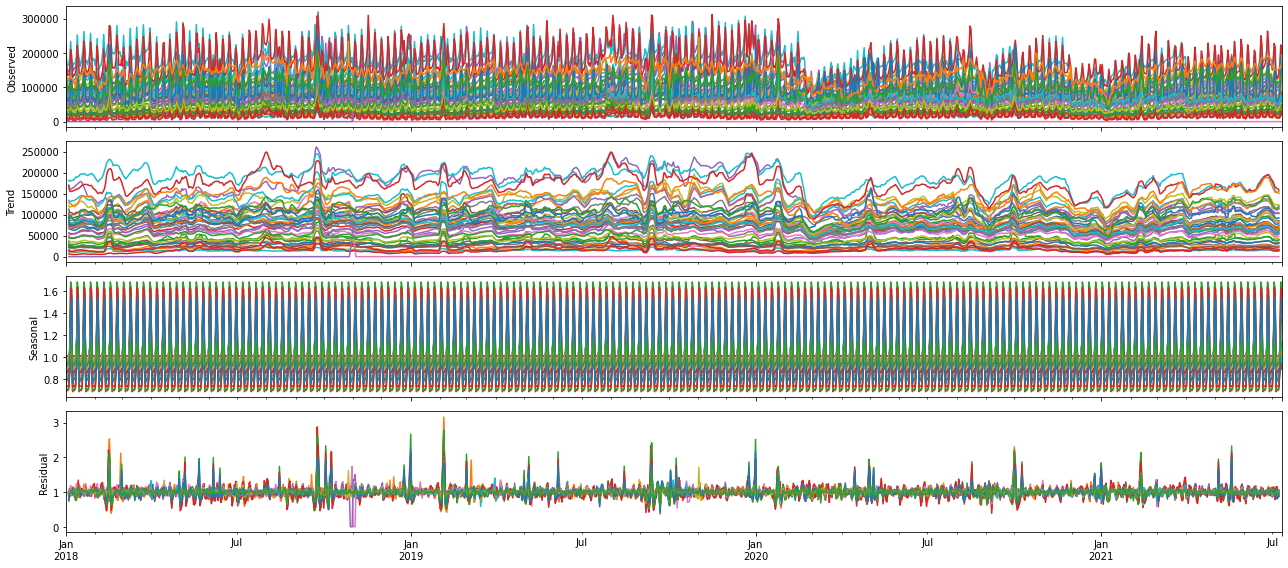

In [15]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(visitor_df, model='multiplicative') # model='addictive'
fig = decomposition.plot()
plt.show()

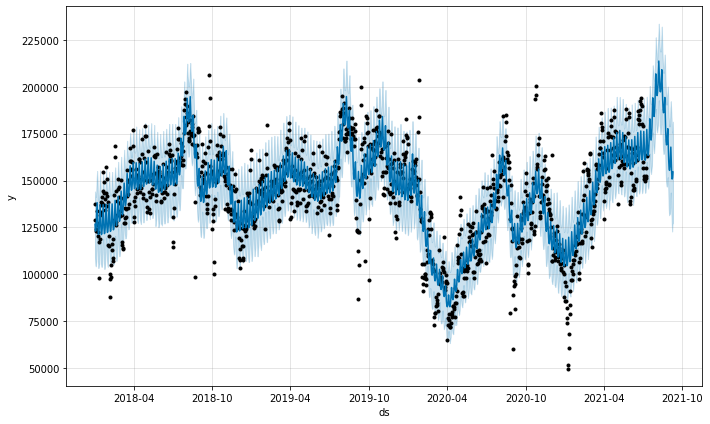

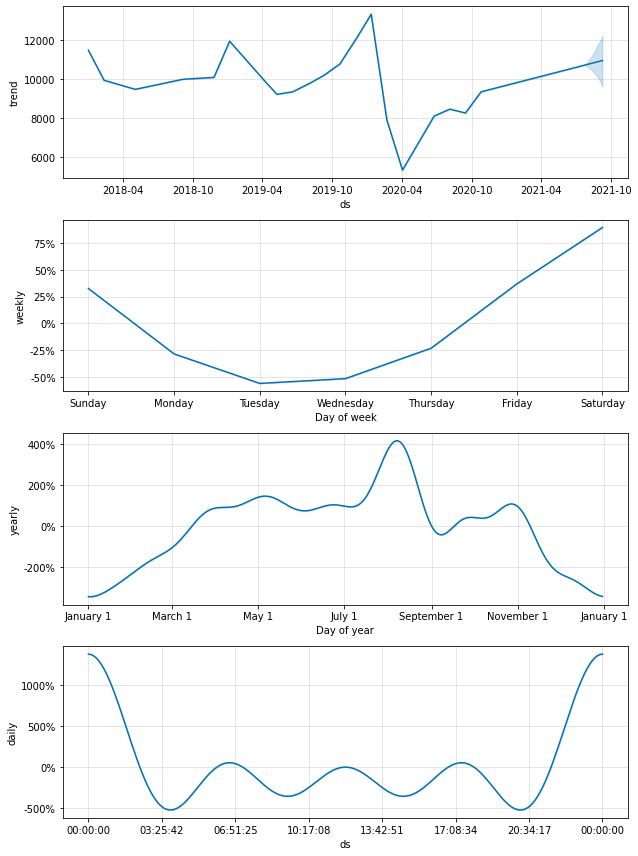

In [35]:
m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, daily_seasonality=True)
for city in ['제주시']: #visitor_df.columns:
    train_data = visitor_df[[city]].reset_index()
    train_data.rename(columns={'index': 'ds', city: 'y'}, inplace=True)
    m.fit(train_data)
    future = m.make_future_dataframe(periods=60)
    forecast = m.predict(future)
    m.plot(forecast)
    m.plot_components(forecast)

In [60]:
# m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, daily_seasonality=True)
period = 30
predict_df = pd.DataFrame(columns=['ds', 'trend', 'city'])
for cityname in tqdm(visitor_df.columns):
    train_data = visitor_df[[city]].reset_index()
    train_data.rename(columns={'index': 'ds', city: 'y'}, inplace=True)
    m = Prophet(seasonality_mode='multiplicative', yearly_seasonality=True, daily_seasonality=True)
    m.fit(train_data)
    future = m.make_future_dataframe(periods=period)
    forecast = m.predict(future)
    new_df = forecast[['ds', 'trend']][-period:].reset_index(drop=True)
    new_df['city'] = cityname
    predict_df = pd.concat([predict_df, new_df], axis=0)
    predict_df.reset_index(drop=True, inplace=True)
predict_df



  0%|          | 0/43 [00:00<?, ?it/s]

  2%|▏         | 1/43 [00:11<08:00, 11.43s/it]

  5%|▍         | 2/43 [00:23<07:50, 11.48s/it]

  7%|▋         | 3/43 [00:34<07:39, 11.50s/it]

  9%|▉         | 4/43 [00:46<07:28, 11.49s/it]

 12%|█▏        | 5/43 [00:57<07:16, 11.48s/it]

 14%|█▍        | 6/43 [01:08<07:03, 11.45s/it]

 16%|█▋        | 7/43 [01:20<06:54, 11.51s/it]

 19%|█▊        | 8/43 [01:31<06:41, 11.48s/it]

 21%|██        | 9/43 [01:43<06:30, 11.48s/it]

 23%|██▎       | 10/43 [01:54<06:19, 11.50s/it]

 26%|██▌       | 11/43 [02:06<06:08, 11.52s/it]

 28%|██▊       | 12/43 [02:17<05:55, 11.46s/it]

 30%|███       | 13/43 [02:29<05:42, 11.43s/it]

 33%|███▎      | 14/43 [02:40<05:30, 11.38s/it]

 35%|███▍      | 15/43 [02:51<05:18, 11.38s/it]

 37%|███▋      | 16/43 [03:03<05:07, 11.39s/it]

 40%|███▉      | 17/43 [03:14<04:55, 11.38s/it]

 42%|████▏     | 18/43 [03:25<04:43, 11.35s/it]

 44%|████▍     | 19/43 [03:37<04:32, 11.35s/it]

 47%|████▋     | 20/43 [03:48<04:21,

,ds,trend,city
0,2021-07-12,10652.804102,청주시 상당구
1,2021-07-13,10657.839820,청주시 상당구
2,2021-07-14,10662.875538,청주시 상당구
3,2021-07-15,10667.911256,청주시 상당구
4,2021-07-16,10672.946975,청주시 상당구
...,...,...,...
1285,2021-08-06,10778.697058,서귀포시
1286,2021-08-07,10783.732777,서귀포시
1287,2021-08-08,10788.768495,서귀포시
1288,2021-08-09,10793.804213,서귀포시


In [59]:
predict_df

,ds,trend,city
0,2021-07-12,10652.804102,청주시 상당구
1,2021-07-13,10657.839820,청주시 상당구
2,2021-07-14,10662.875538,청주시 상당구
3,2021-07-15,10667.911256,청주시 상당구
4,2021-07-16,10672.946975,청주시 상당구
5,2021-07-17,10677.982693,청주시 상당구
6,2021-07-18,10683.018411,청주시 상당구
7,2021-07-19,10688.054129,청주시 상당구
8,2021-07-20,10693.089848,청주시 상당구
9,2021-07-21,10698.125566,청주시 상당구
